# Convolutional Neural Networks
You should build an end-to-end machine learning pipeline using a convolutional neural network model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [convolutional neural network](https://keras.io/examples/vision/mnist_convnet/) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

import the necessary libraries

In [2]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Model / data parameters

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#images shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#Model Optimization: Multi-Scenario Analysis

Scenario 1: Baseline Model

In [4]:
def build_baseline_model():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

Scenario 2: Model with Batch Normalization

In [5]:
def build_batchnorm_model():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),

            layers.Conv2D(32, kernel_size=(3, 3)),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Conv2D(64, kernel_size=(3, 3)),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

Scenario 3: Deeper & Wider Model

In [6]:
def build_deeper_model():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),

            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),

            layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),

            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

Training and Final Pipeline Evaluation

In [7]:
final_model = build_batchnorm_model()

print("Final Model Architecture:")
final_model.summary()

batch_size = 128
epochs = 15

print("\nStarting model training...")
history = final_model.fit(
    x_train,
    y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)
print("Model training complete.")

Final Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,210 (137.54 KB)

 Trainable params: 35,018 (136.79 KB)

 Non-trainable params: 192 (768.00 B)


Starting model training...
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 104s 240ms/step - accuracy: 0.7904 - loss: 0.7068 - val_accuracy: 0.8827 - val_loss: 0.3627
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 202ms/step - accuracy: 0.9634 - loss: 0.1144 - val_accuracy: 0.9867 - val_loss: 0.0485
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 152s 226ms/step - accuracy: 0.9749 - loss: 0.0813 - val_accuracy: 0.9900 - val_loss: 0.0377
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 114s 160ms/step - accuracy: 0.9787 - loss: 0.0677 - val_accuracy: 0.9878 - val_loss: 0.0409
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 93s 187ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9873 - val_loss: 0.0412
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 176ms/step - accuracy: 0.9817 - loss: 0.0526 - val_accuracy: 0.9882 - val_loss: 0.0428
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 65s 155ms/step - accuracy: 0.9842 - loss: 0.0481 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 66s 156ms/st

Evaluate on Test Set

In [9]:
print("\nEvaluating model on test set...")
score = final_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

y_pred_probs = final_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Evaluating model on test set...
Test loss: 0.0227
Test accuracy: 0.9926
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




Confusion Matrix:


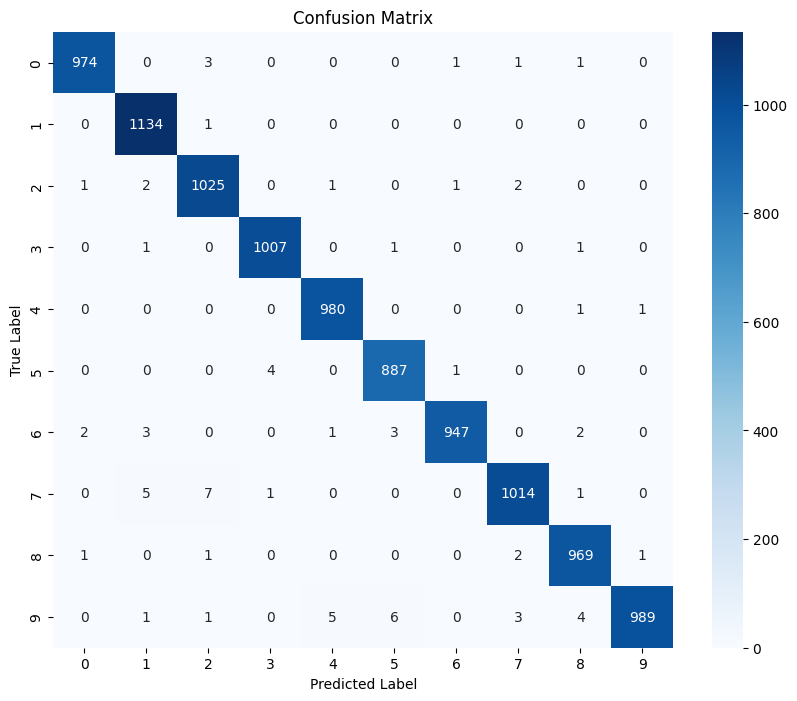

In [10]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()